In [1]:
import gymnasium as gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from time import time
from bettermdptools.utils.blackjack_wrapper import BlackjackWrapper
from IPython.display import clear_output
from bettermdptools.algorithms.planner import Planner
from bettermdptools.utils.plots import Plots
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.rl import RL
from bettermdptools.utils.decorators import add_to

## Value Iteration

In [2]:
@add_to(Plots)
@staticmethod
def modified_plot_policy(val_max, directions, map_size, title):
    # data = np.around(val_max, 2)
    """Plot the policy learned."""
    sns.heatmap(
        val_max,
        annot=directions,
        fmt="",
        cmap=sns.color_palette("magma_r", as_cmap=True),
        linewidths=0.7,
        linecolor="black",
    ).set(title=title)
    img_title = f"Policy_{map_size[0]}x{map_size[1]}.png"
    plt.show()

In [46]:
base_env = gym.make('Blackjack-v1', render_mode=None)
blackjack = BlackjackWrapper(base_env)

gammas = [0.01, 0.25, 0.5, 0.75, 0.9, 0.99]
V = {}
V_track = {}
pi = {}

for gamma in gammas:
    V[gamma], V_track[gamma], pi[gamma] = Planner(blackjack.P).value_iteration(gamma=gamma, n_iters=1000, theta=1e-10)

runtime = 0.01 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds


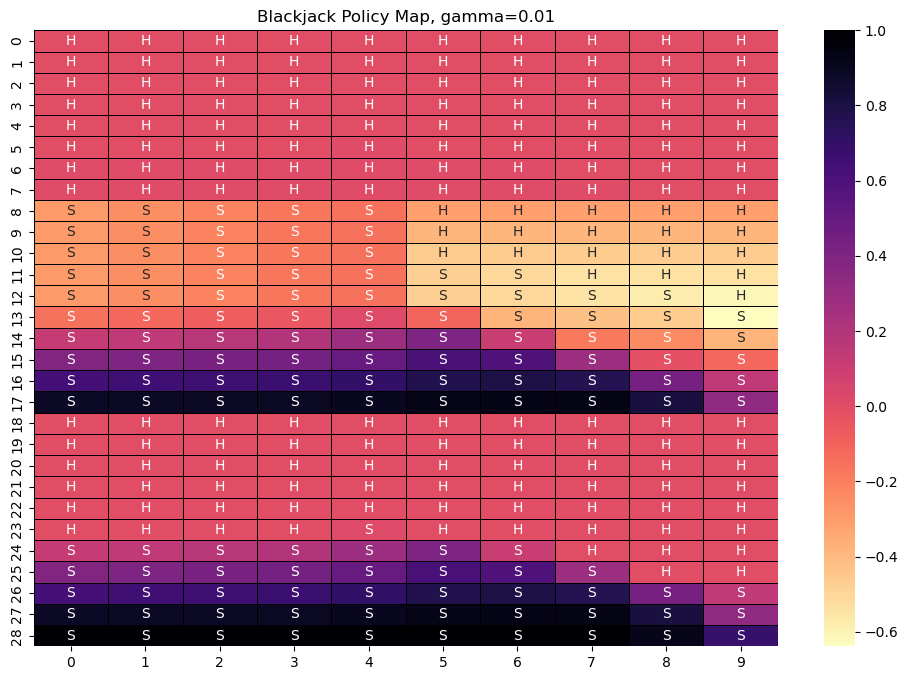

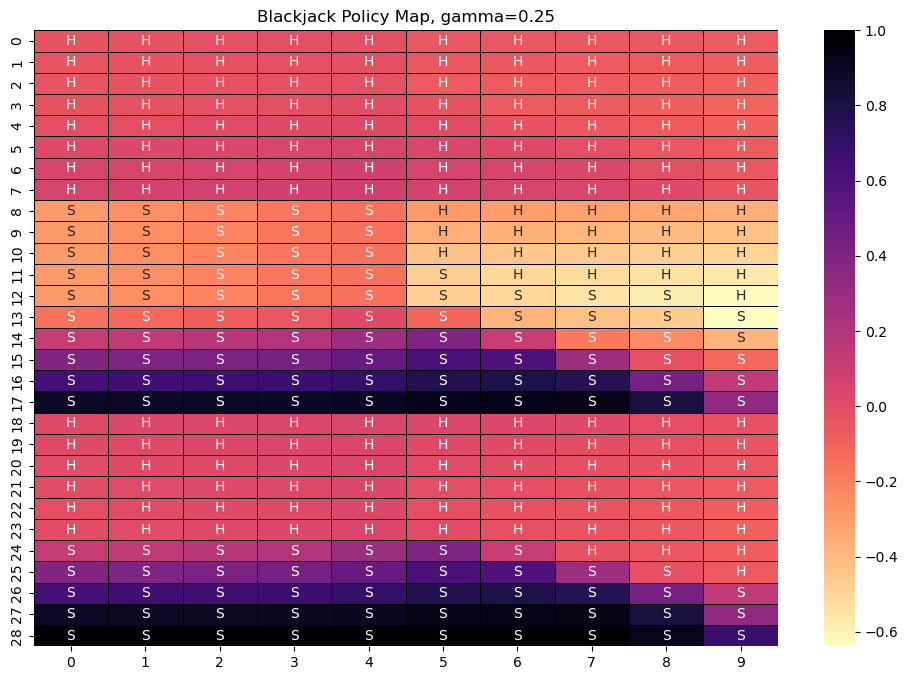

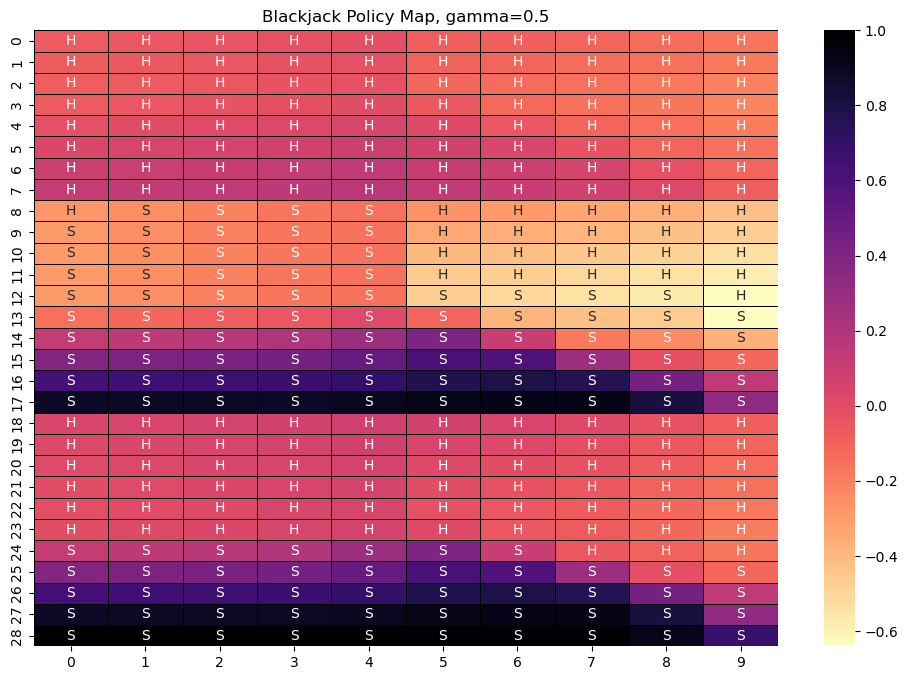

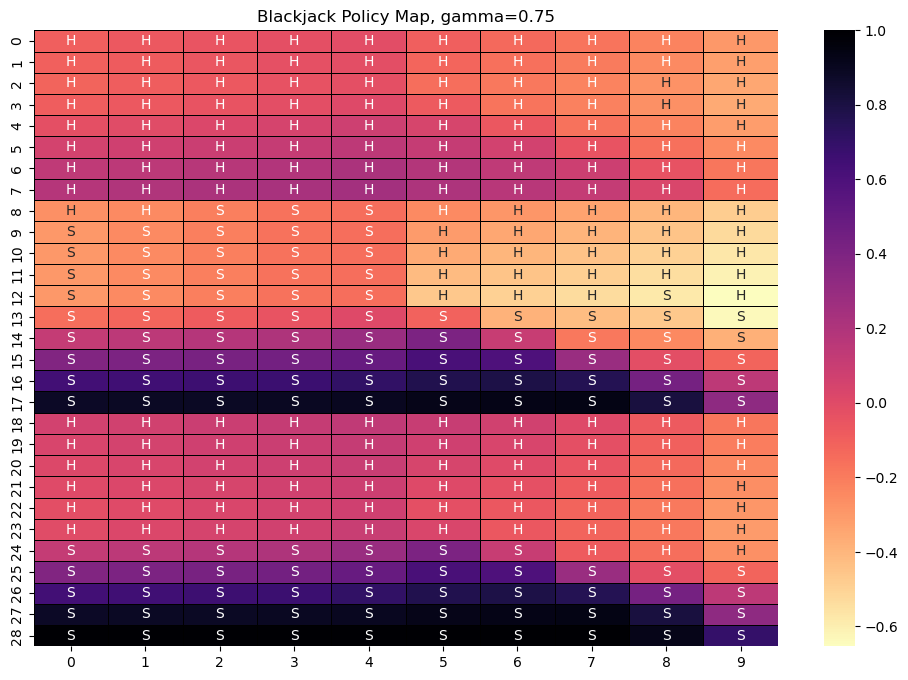

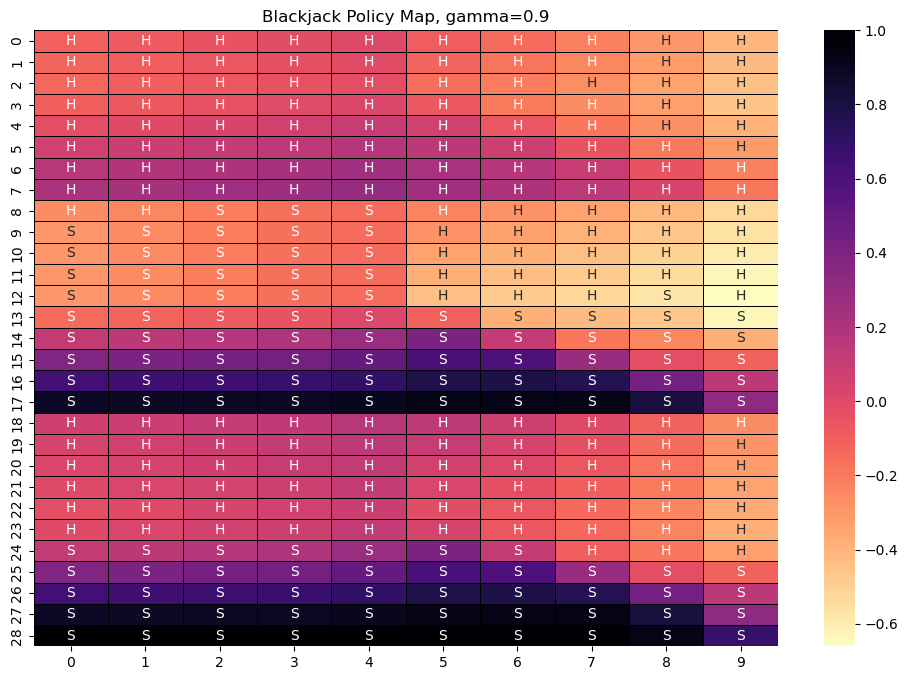

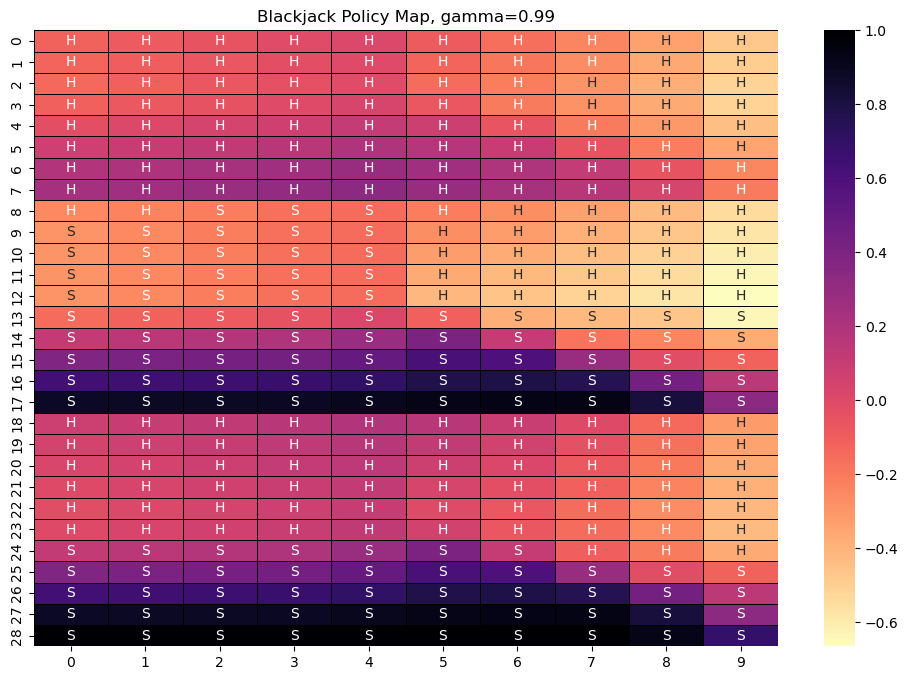

In [47]:
blackjack_actions = {0: "S", 1: "H"}
blackjack_map_size=(29, 10)

#get formatted state values and policy map

for gamma in gammas:
    plt.figure(figsize=(12, 8))
    val_max, policy_map = Plots.get_policy_map(pi[gamma], V[gamma], blackjack_actions, blackjack_map_size)
    Plots.modified_plot_policy(val_max, policy_map, blackjack_map_size, title=f"Blackjack Policy Map, gamma={gamma}")

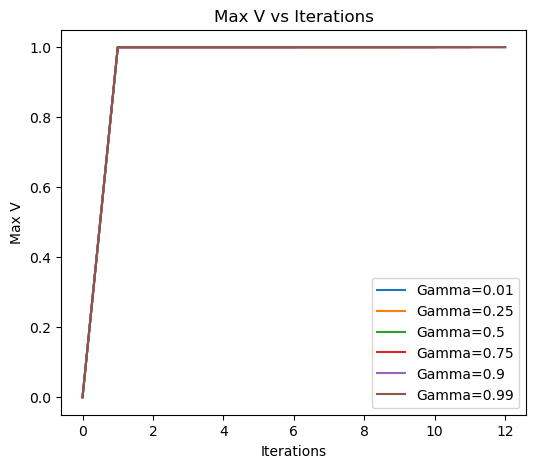

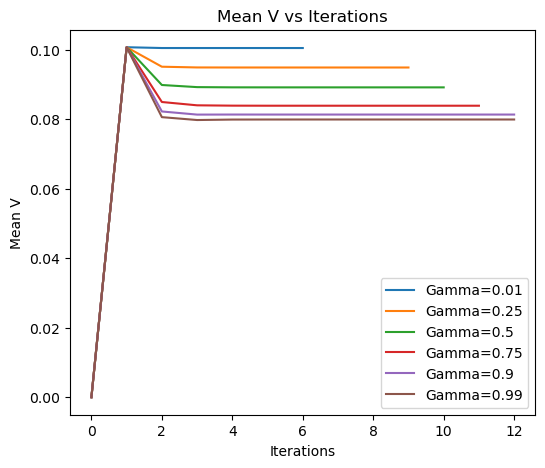

In [48]:
# Clip trailing zeros in case convergence is reached before max iterations
# This is likely when setting the n_iters parameter
max_value_per_iter = {}
mean_value_per_iter = {}

for gamma in gammas:
    max_value_per_iter[gamma] = np.trim_zeros(np.max(V_track[gamma], axis=1), 'b')
    mean_value_per_iter[gamma] = np.trim_zeros(np.mean(V_track[gamma], axis=1), 'b')
# Plot max_v vs iterations
plt.figure(figsize=(6, 5))
for gamma in gammas:
    plt.plot(max_value_per_iter[gamma], label=f"Gamma={gamma}")
plt.xlabel("Iterations")
plt.ylabel("Max V")
plt.title("Max V vs Iterations")
plt.legend()
plt.show()

# Plot mean_v vs iterations
plt.figure(figsize=(6, 5))
for gamma in gammas:
    plt.plot(mean_value_per_iter[gamma], label=f"Gamma={gamma}")
plt.xlabel("Iterations")
plt.ylabel("Mean V")
plt.title("Mean V vs Iterations")
plt.legend()
plt.show()

Time Elapsed: 5.274646043777466 seconds


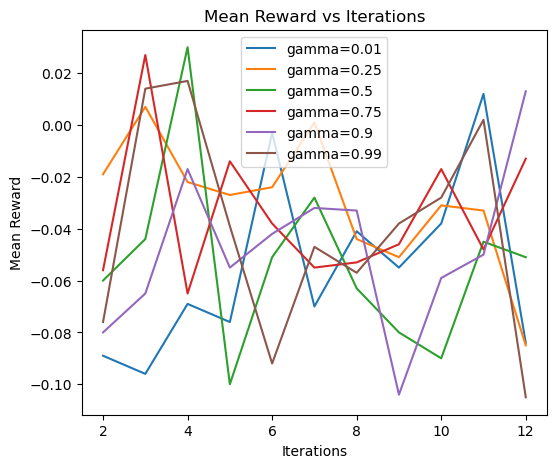

In [51]:
blackjack._max_episode_steps = 100
reward_vi = {}
plot_range = range(2,13)
gammas = [0.01, 0.25, 0.5, 0.75, 0.9, 0.99]
start_time = time()
for gamma in gammas:
    reward_vi[gamma] = []
    for n in plot_range:
        np.random.seed(2)
        V_tmp, V_track_tmp, pi_tmp = Planner(blackjack.P).value_iteration(gamma=gamma, n_iters=n, theta=1e-6)
        reward_tmp = TestEnv.test_env(env=blackjack, n_iters=1000, render=False, pi=pi_tmp, user_input=False)
        reward_vi[gamma].append(np.mean(reward_tmp))
        clear_output(wait=True)
end_time = time()
time_elapsed = end_time - start_time
print(f"Time Elapsed: {time_elapsed} seconds")

plt.figure(figsize=(6, 5))
for key, value in reward_vi.items():
    plt.plot(plot_range, reward_vi[key], label=f"gamma={key}")
plt.xlabel("Iterations")
plt.ylabel("Mean Reward")
plt.title("Mean Reward vs Iterations")
plt.legend()
plt.show()

## Policy Iteration

In [54]:
base_env = gym.make('Blackjack-v1', render_mode=None)
blackjack = BlackjackWrapper(base_env)

gammas = [0.01, 0.25, 0.5, 0.75, 0.9, 0.99]
V = {}
V_track = {}
pi = {}

for gamma in gammas:
    V[gamma], V_track[gamma], pi[gamma] = Planner(blackjack.P).policy_iteration(gamma=gamma, n_iters=1000, theta=1e-10)

runtime = 0.01 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds


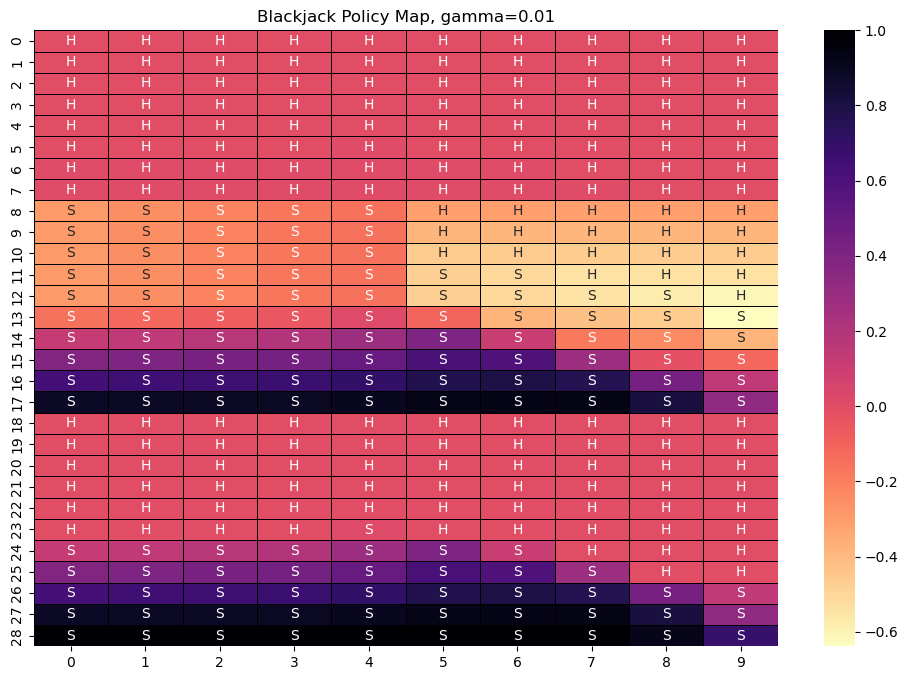

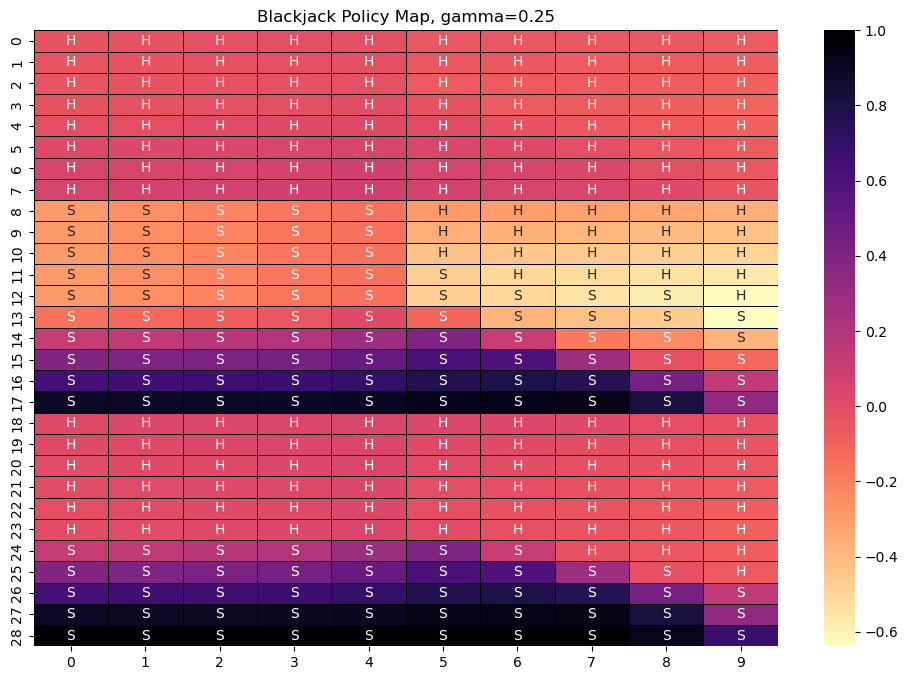

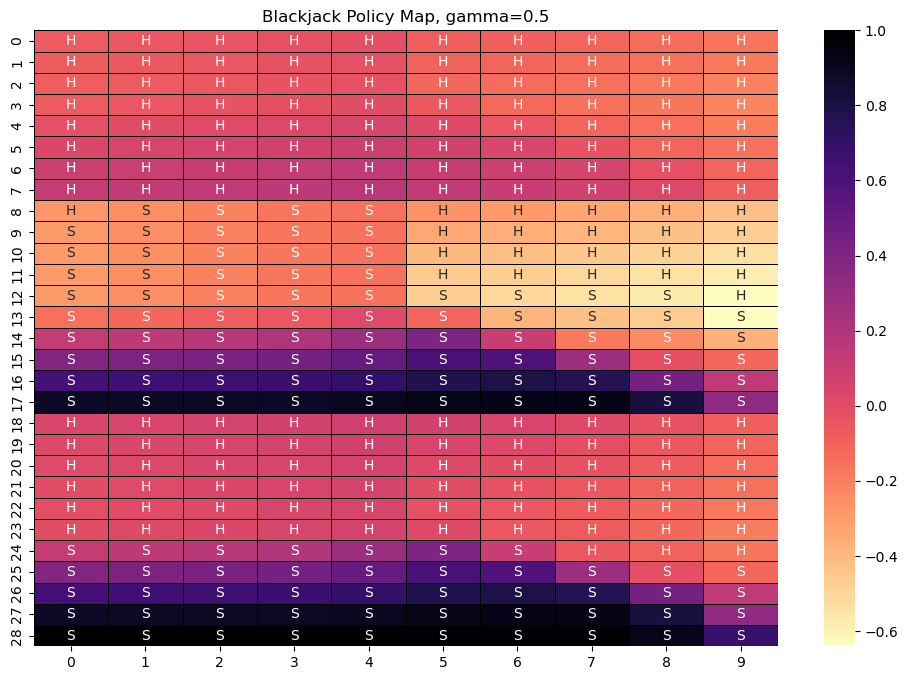

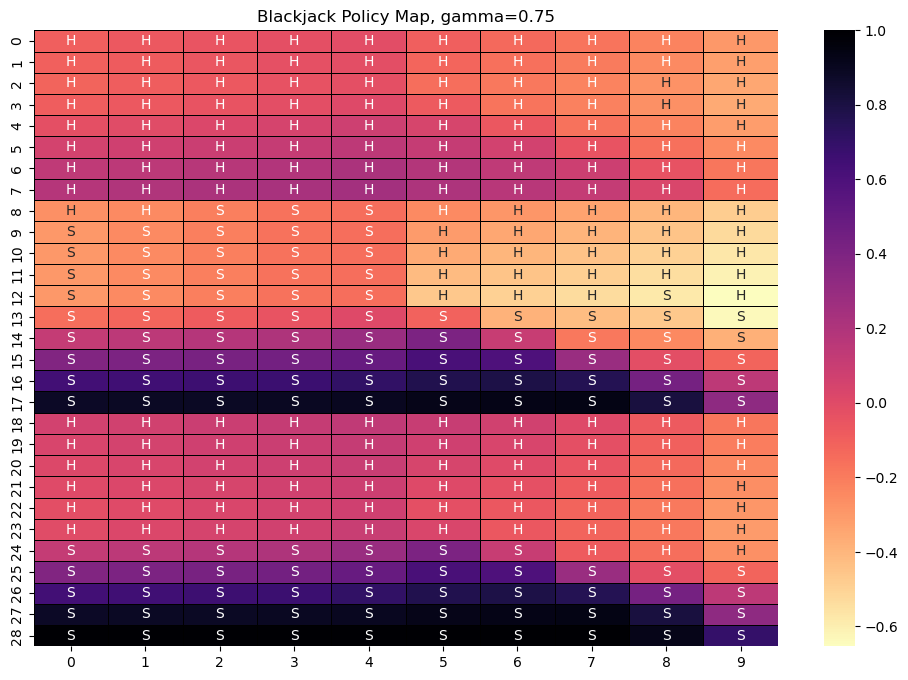

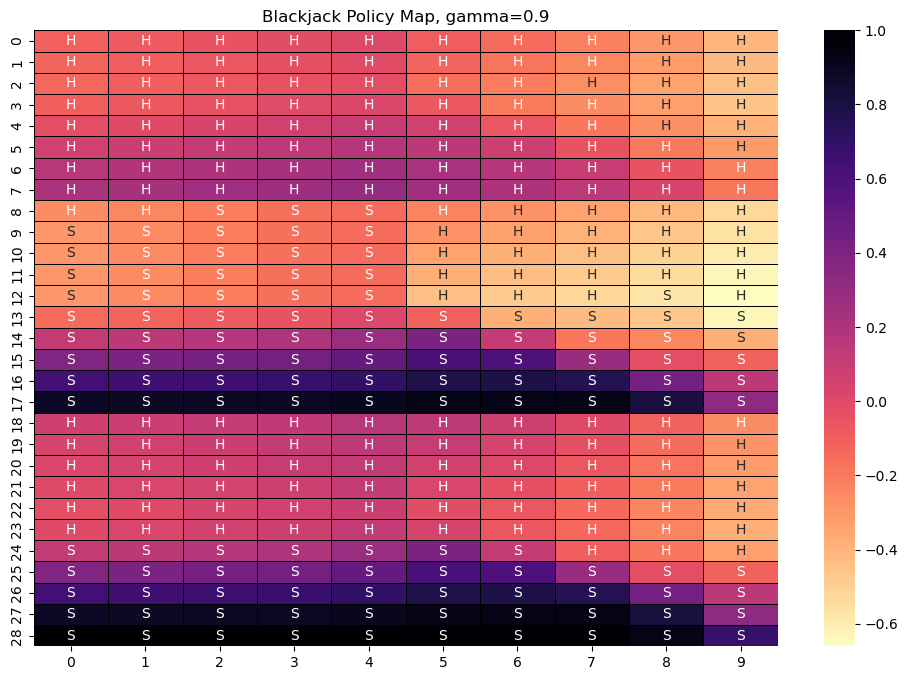

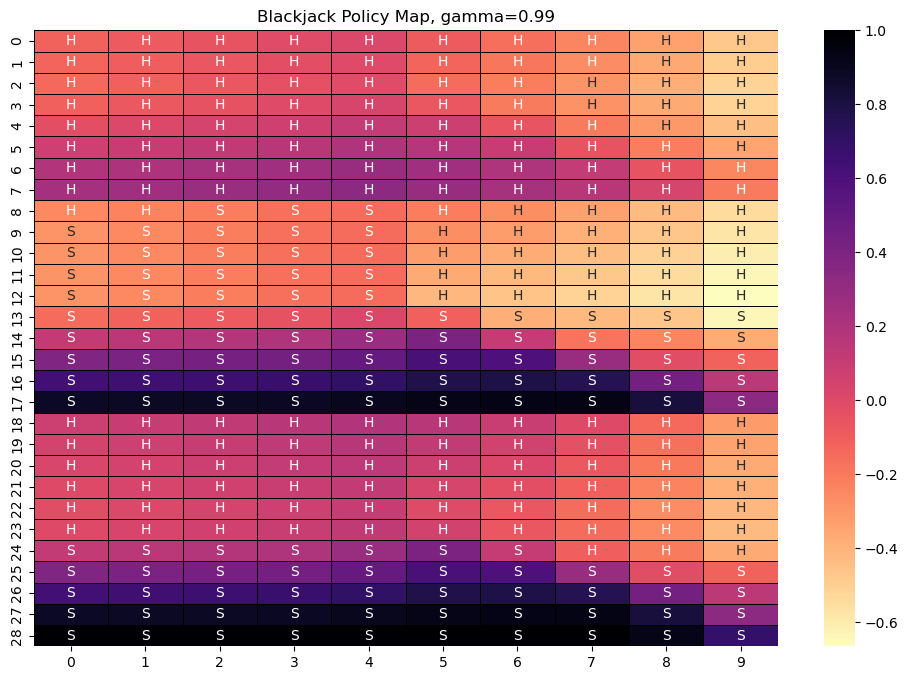

In [55]:
blackjack_actions = {0: "S", 1: "H"}
blackjack_map_size=(29, 10)

#get formatted state values and policy map

for gamma in gammas:
    plt.figure(figsize=(12, 8))
    val_max, policy_map = Plots.get_policy_map(pi[gamma], V[gamma], blackjack_actions, blackjack_map_size)
    Plots.modified_plot_policy(val_max, policy_map, blackjack_map_size, title=f"Blackjack Policy Map, gamma={gamma}")

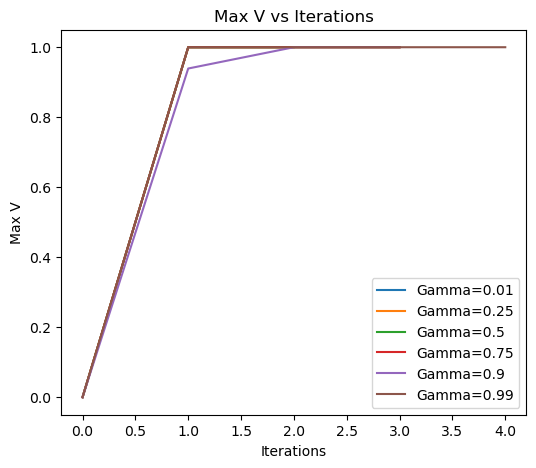

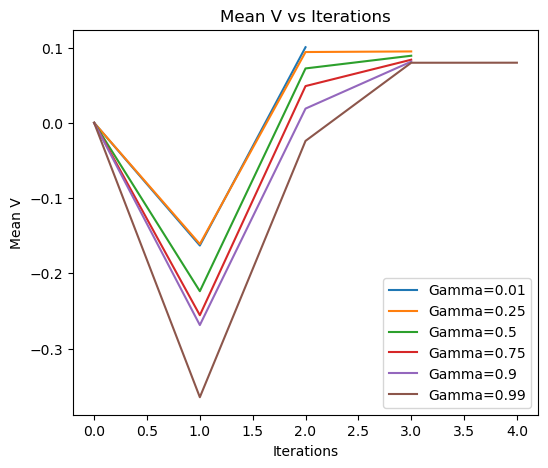

In [56]:
# Clip trailing zeros in case convergence is reached before max iterations
# This is likely when setting the n_iters parameter
max_value_per_iter = {}
mean_value_per_iter = {}

for gamma in gammas:
    max_value_per_iter[gamma] = np.trim_zeros(np.max(V_track[gamma], axis=1), 'b')
    mean_value_per_iter[gamma] = np.trim_zeros(np.mean(V_track[gamma], axis=1), 'b')
# Plot max_v vs iterations
plt.figure(figsize=(6, 5))
for gamma in gammas:
    plt.plot(max_value_per_iter[gamma], label=f"Gamma={gamma}")
plt.xlabel("Iterations")
plt.ylabel("Max V")
plt.title("Max V vs Iterations")
plt.legend()
plt.show()

# Plot mean_v vs iterations
plt.figure(figsize=(6, 5))
for gamma in gammas:
    plt.plot(mean_value_per_iter[gamma], label=f"Gamma={gamma}")
plt.xlabel("Iterations")
plt.ylabel("Mean V")
plt.title("Mean V vs Iterations")
plt.legend()
plt.show()

Time Elapsed: 5.41791296005249 seconds


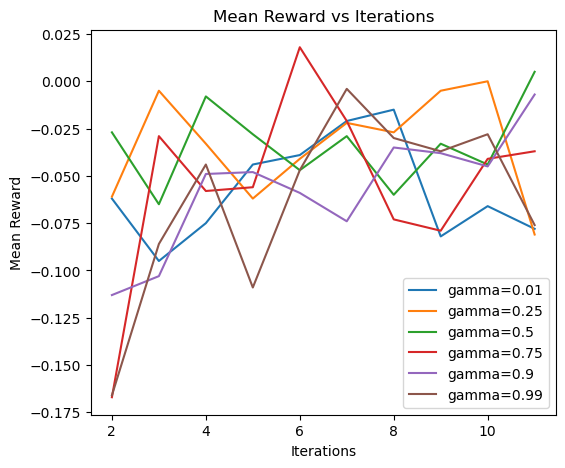

In [58]:
blackjack._max_episode_steps = 100
reward_vi = {}
plot_range = range(2,12)
gammas = [0.01, 0.25, 0.5, 0.75, 0.9, 0.99]
start_time = time()
for gamma in gammas:
    reward_vi[gamma] = []
    for n in plot_range:
        np.random.seed(2)
        V_tmp, V_track_tmp, pi_tmp = Planner(blackjack.P).policy_iteration(gamma=gamma, n_iters=n, theta=1e-6)
        reward_tmp = TestEnv.test_env(env=blackjack, n_iters=1000, render=False, pi=pi_tmp, user_input=False)
        reward_vi[gamma].append(np.mean(reward_tmp))
        clear_output(wait=True)
end_time = time()
time_elapsed = end_time - start_time
print(f"Time Elapsed: {time_elapsed} seconds")

plt.figure(figsize=(6, 5))
for key, value in reward_vi.items():
    plt.plot(plot_range, reward_vi[key], label=f"gamma={key}")
plt.xlabel("Iterations")
plt.ylabel("Mean Reward")
plt.title("Mean Reward vs Iterations")
plt.legend()
plt.show()

## Q-Learning

#### gamma tuning

In [65]:
base_env = gym.make('Blackjack-v1', render_mode=None)
blackjack._max_episode_steps = 100
gammas = [0.01, 0.25, 0.5, 0.75, 0.9, 0.99]

Q = {}
V = {}
pi = {}
Q_track = {}
pi_track = {}
Q['gamma'] = {}
V['gamma'] = {}
pi['gamma'] = {}
Q_track['gamma'] = {}
pi_track['gamma'] = {}

for gamma in gammas:
    Q_tmp, V_tmp, pi_tmp, Q_track_tmp, pi_track_tmp = RL(blackjack).q_learning(gamma=gamma, epsilon_decay_ratio=0.5, n_episodes=100000)
    Q['gamma'][gamma] = Q_tmp
    V['gamma'][gamma] = V_tmp
    pi['gamma'][gamma] = pi_tmp
    Q_track['gamma'][gamma] = Q_track_tmp
    pi_track['gamma'][gamma] = pi_track_tmp

runtime = 8.66 seconds


runtime = 9.16 seconds


runtime = 9.82 seconds


runtime = 9.67 seconds


runtime = 9.63 seconds


runtime = 9.53 seconds


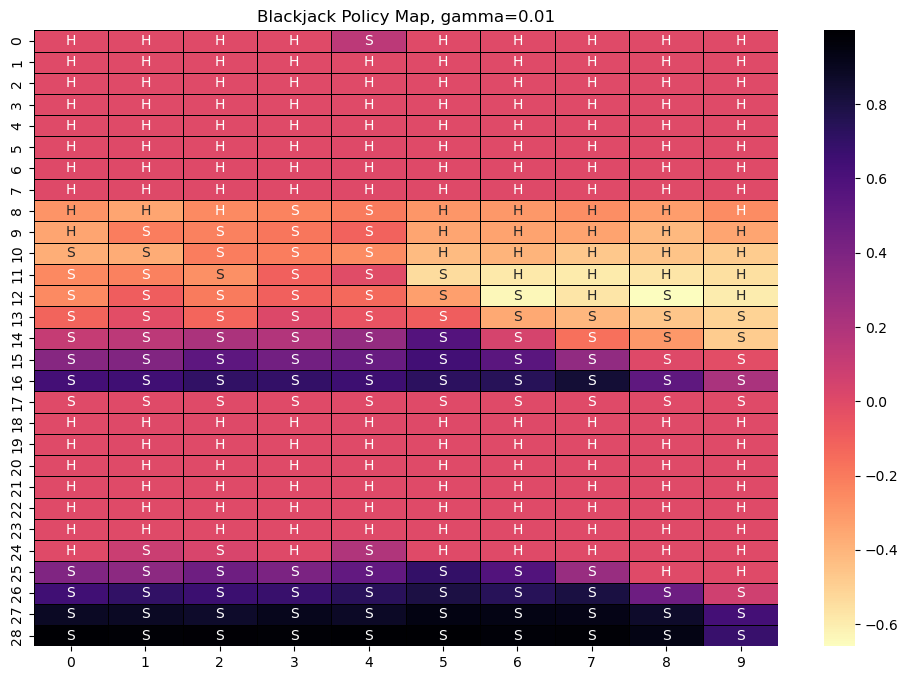

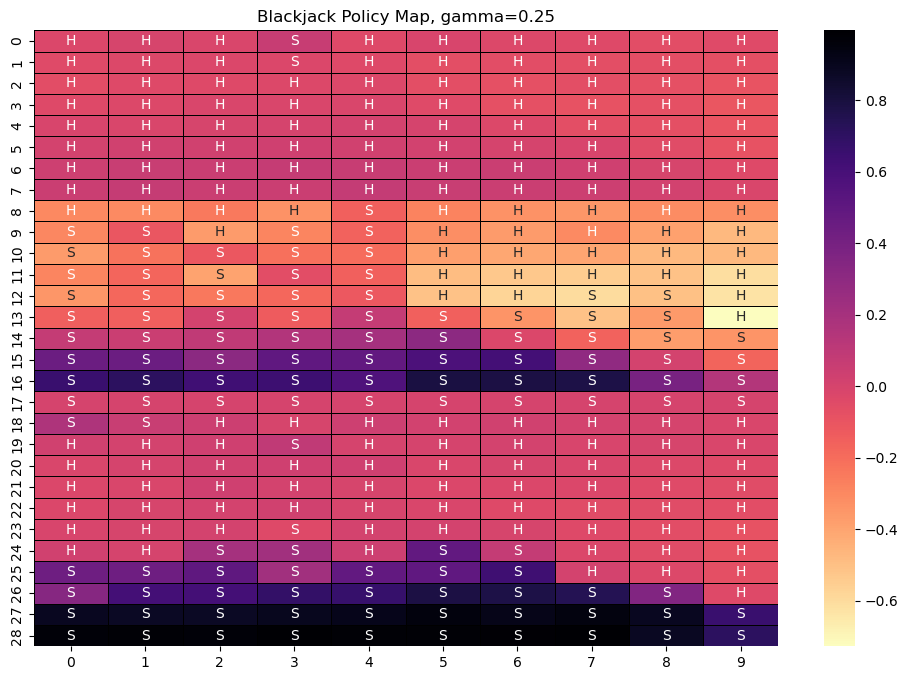

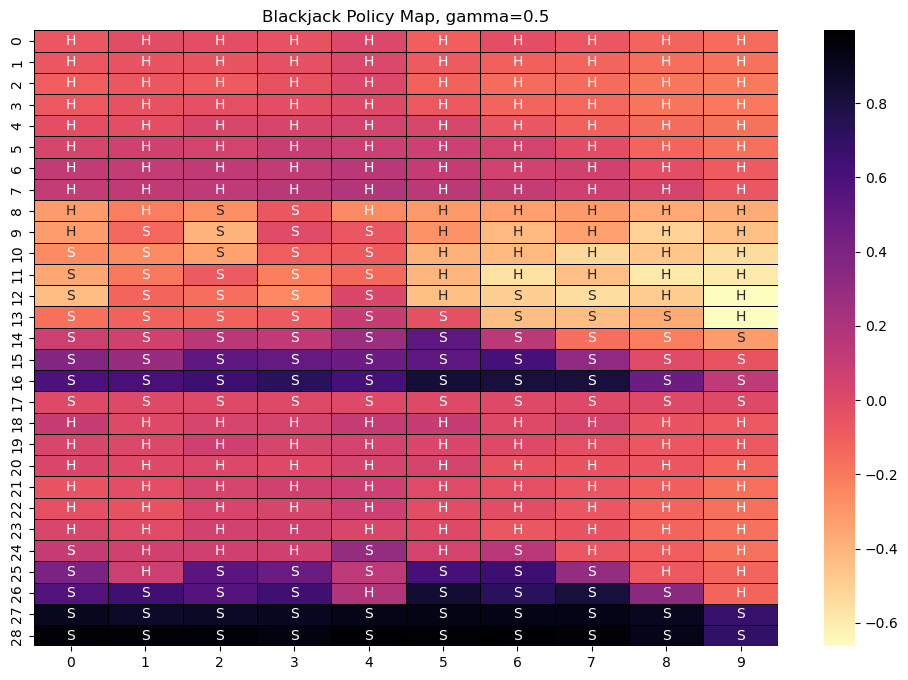

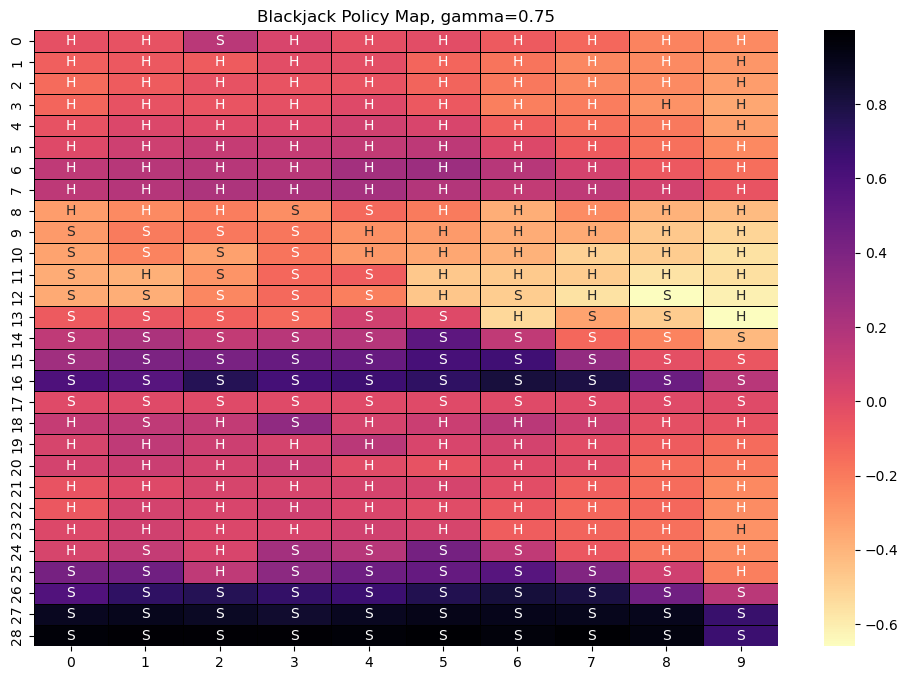

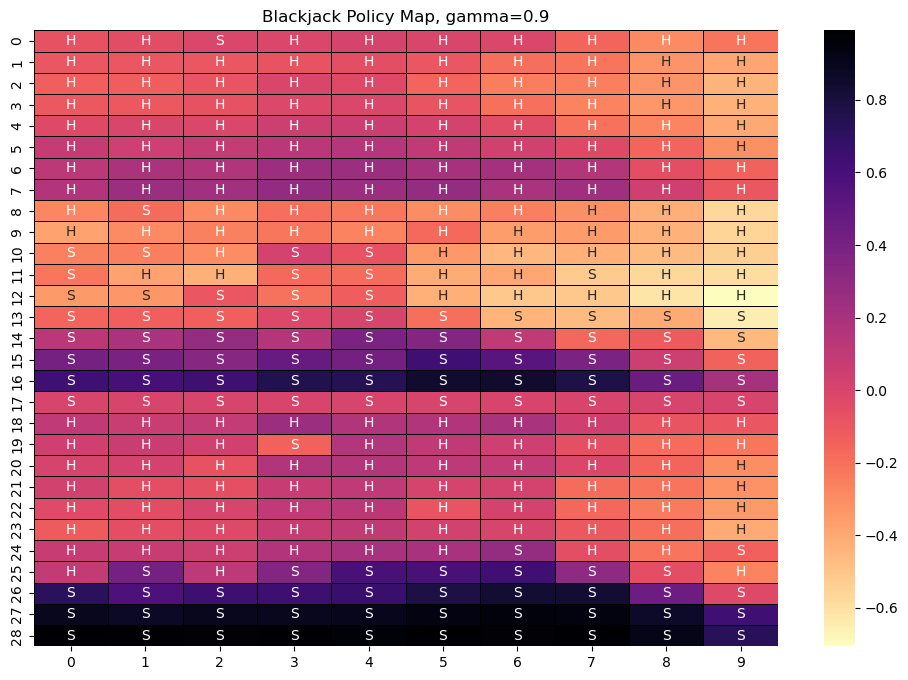

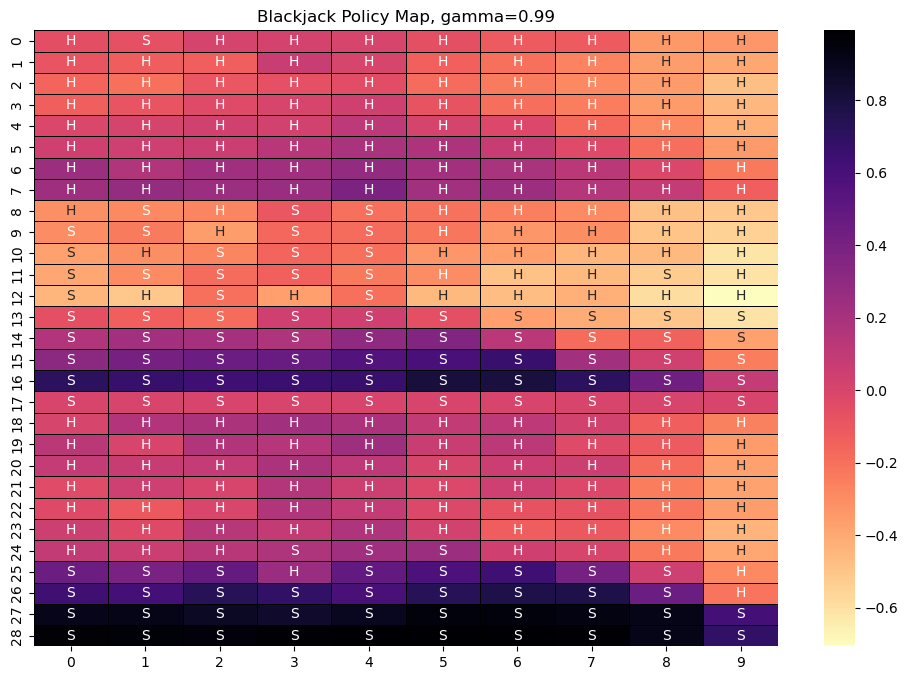

In [66]:
for gamma in gammas:
    plt.figure(figsize=(12, 8))
    val_max, policy_map = Plots.get_policy_map(pi['gamma'][gamma], V['gamma'][gamma], blackjack_actions, blackjack_map_size)
    Plots.modified_plot_policy(val_max, policy_map, blackjack_map_size, title=f"Blackjack Policy Map, gamma={gamma}")

(99999,)


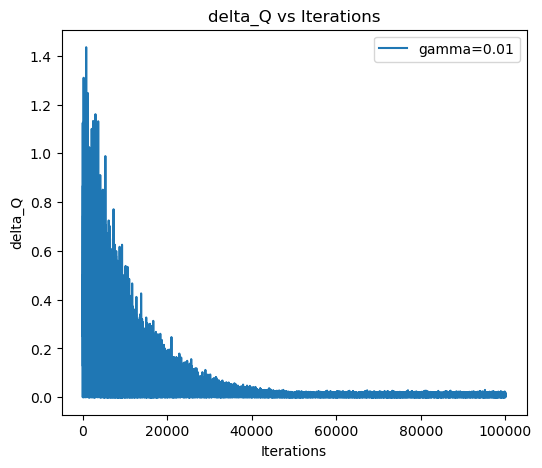

(99999,)


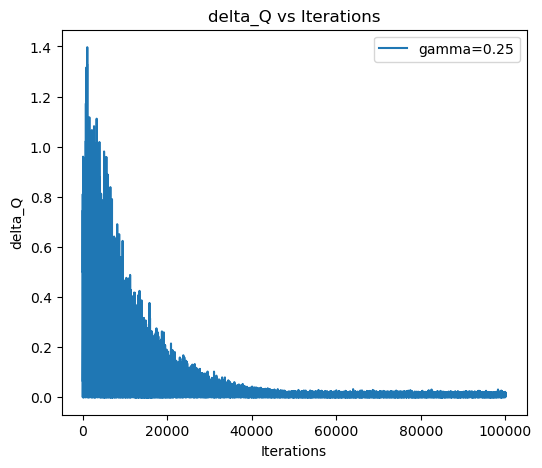

(99999,)


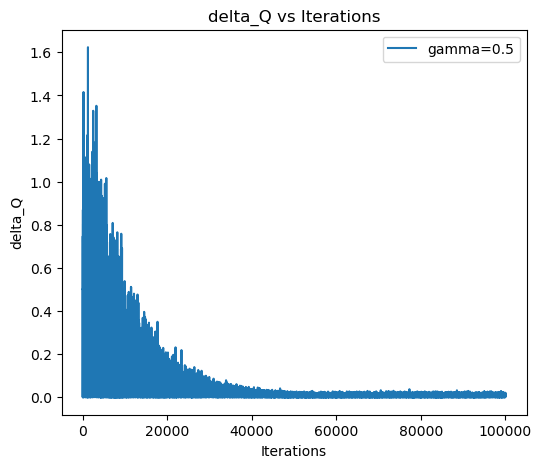

(99999,)


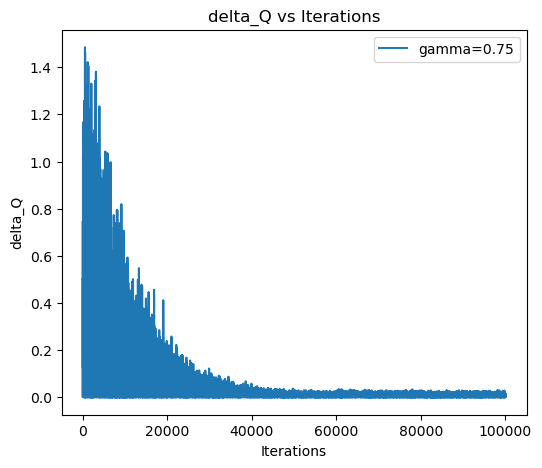

(99999,)


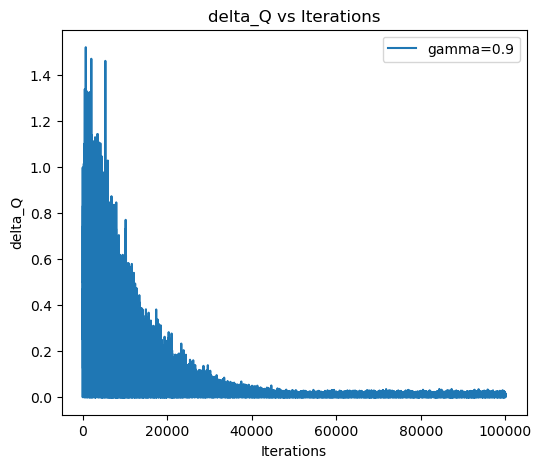

(99999,)


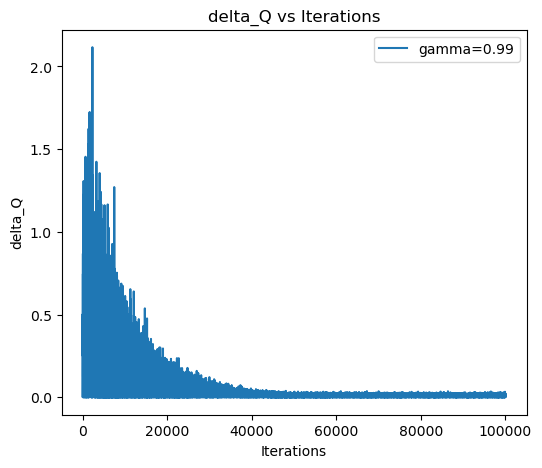

In [67]:
# Example Q-matrix (replace this with your actual Q-matrix)
# Reshape Q to have two dimensions (N, 4)
for gamma in gammas:
    Q_track_copy = Q_track['gamma'][gamma].copy()
    Q_track_reshaped = Q_track_copy.reshape(Q_track_copy.shape[0], Q_track_copy.shape[1] * Q_track_copy.shape[2])

    # Calculate differences between consecutive rows
    delta_Q = np.diff(Q_track_reshaped, axis=0)
    # delta_Q = delta_Q[::1000]
    # Sum absolute differences
    delta_Q = np.sum(np.abs(delta_Q), axis=1)
    print(delta_Q.shape)
    plt.figure(figsize=(6, 5))
    plt.plot(delta_Q, label=f"gamma={gamma}")
    plt.xlabel("Iterations")
    plt.ylabel("delta_Q")
    plt.title(f"delta_Q vs Iterations")
    plt.legend()
    plt.show()

Time Elapsed: 1.0196921825408936 seconds


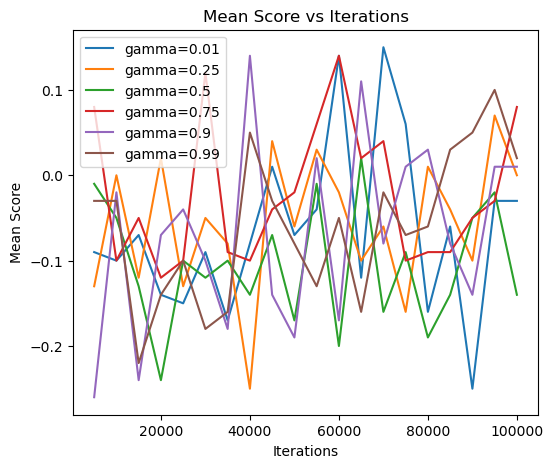

In [68]:
test_env = TestEnv()
reward_vi = {}
gammas = [0.01, 0.25, 0.5, 0.75, 0.9, 0.99]
plot_range = range(4999, 100000, 5000)
start_time = time()
for gamma in gammas:
    reward_vi[gamma] = []
    for n in plot_range:
        reward_tmp = test_env.test_env(blackjack, render=False, pi=pi_track['gamma'][gamma][n], n_iters=100)
        reward_vi[gamma].append(np.mean(reward_tmp))
        clear_output(wait=True)
end_time = time()
time_elapsed = end_time - start_time
print(f"Time Elapsed: {time_elapsed} seconds")

plt.figure(figsize=(6, 5))
for key, value in reward_vi.items():
    plt.plot(plot_range, reward_vi[key], label=f"gamma={key}")
plt.xlabel("Iterations")
plt.ylabel("Mean Score")
plt.title("Mean Score vs Iterations")
plt.legend()
plt.show()

#### epsilon tuning

In [75]:
epsilon_decays = [0.25, 0.5, 0.75, 0.9]

Q['epsilon'] = {}
V['epsilon'] = {}
pi['epsilon'] = {}
Q_track['epsilon'] = {}
pi_track['epsilon'] = {}


for epsilon_decay in epsilon_decays:
    Q_tmp, V_tmp, pi_tmp, Q_track_tmp, pi_track_tmp = RL(blackjack).q_learning(gamma=0.99, epsilon_decay_ratio=epsilon_decay, n_episodes=100000)
    Q['epsilon'][epsilon_decay] = Q_tmp
    V['epsilon'][epsilon_decay] = V_tmp
    pi['epsilon'][epsilon_decay] = pi_tmp
    Q_track['epsilon'][epsilon_decay] = Q_track_tmp
    pi_track['epsilon'][epsilon_decay] = pi_track_tmp

runtime = 8.90 seconds


runtime = 9.52 seconds


runtime = 9.97 seconds


runtime = 9.92 seconds


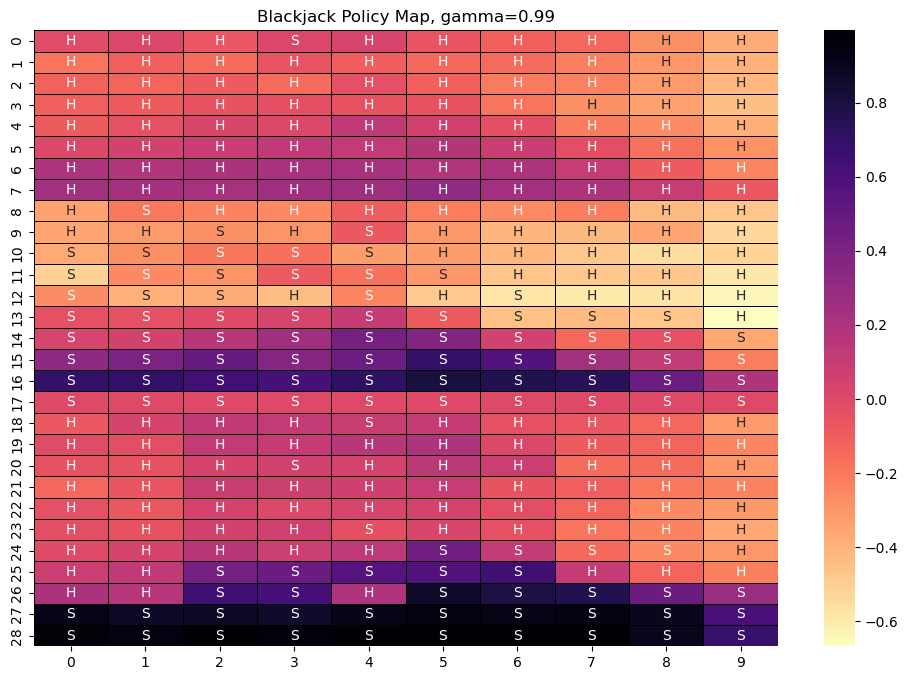

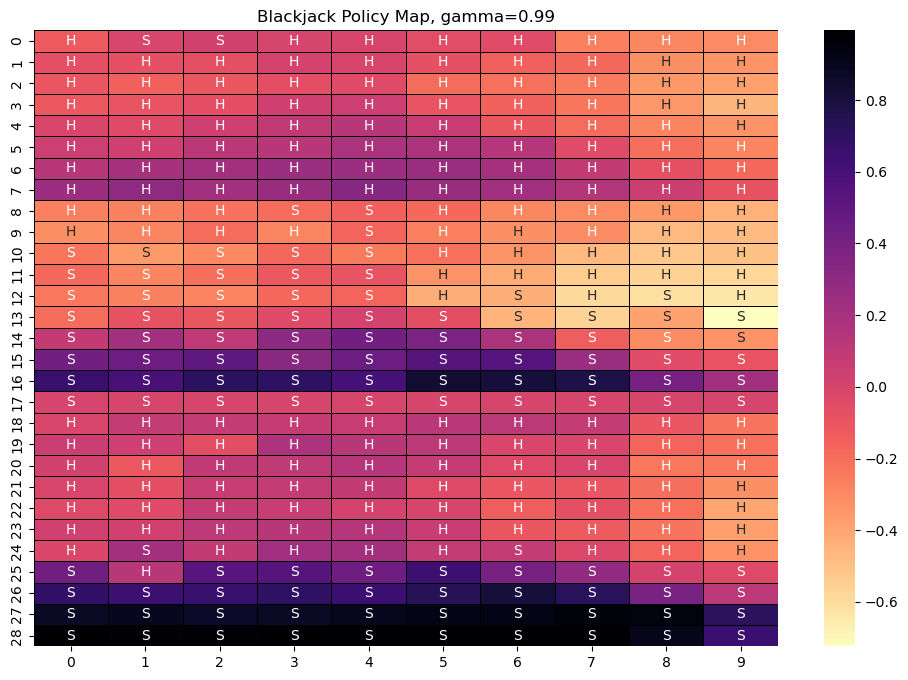

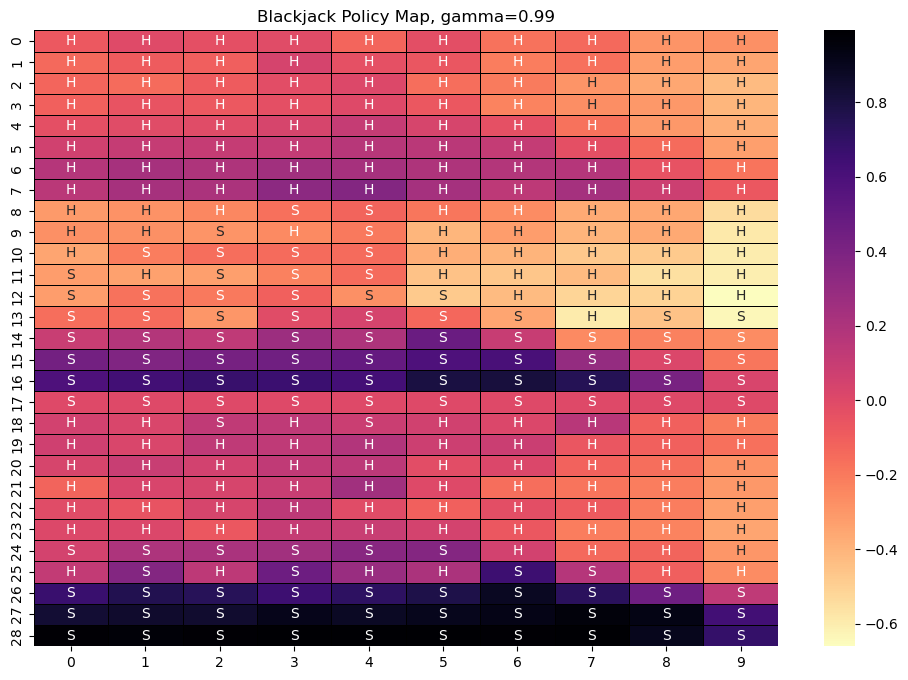

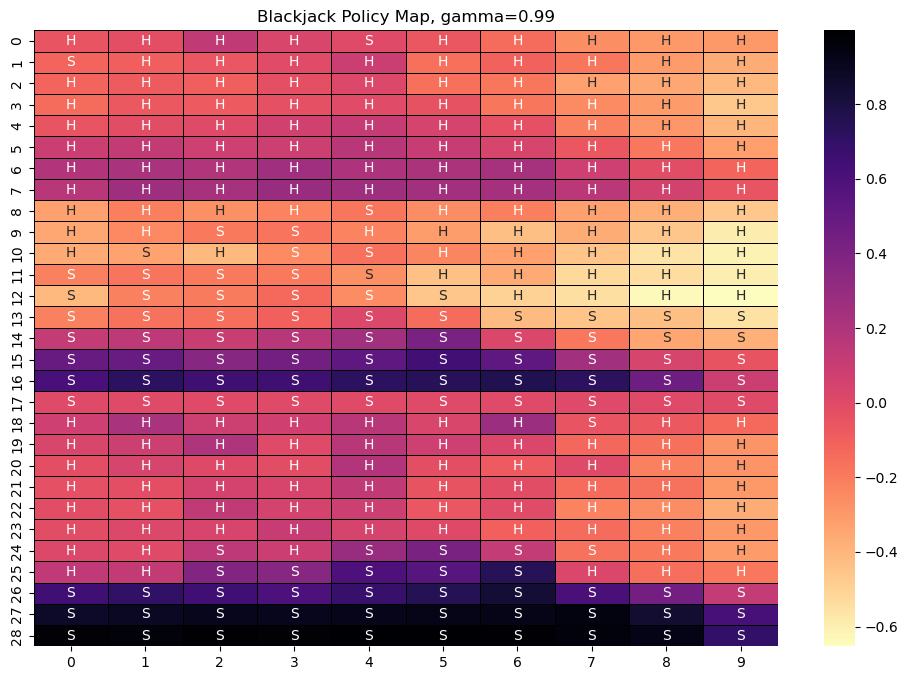

In [70]:
for epsilon_decay in epsilon_decays:
    plt.figure(figsize=(12, 8))
    val_max, policy_map = Plots.get_policy_map(pi['epsilon'][epsilon_decay], V['epsilon'][epsilon_decay], blackjack_actions, blackjack_map_size)
    Plots.modified_plot_policy(val_max, policy_map, blackjack_map_size, title=f"Blackjack Policy Map, gamma={gamma}")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(99999,)


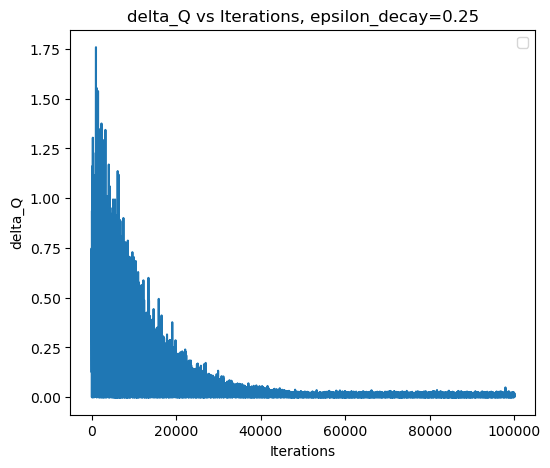

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(99999,)


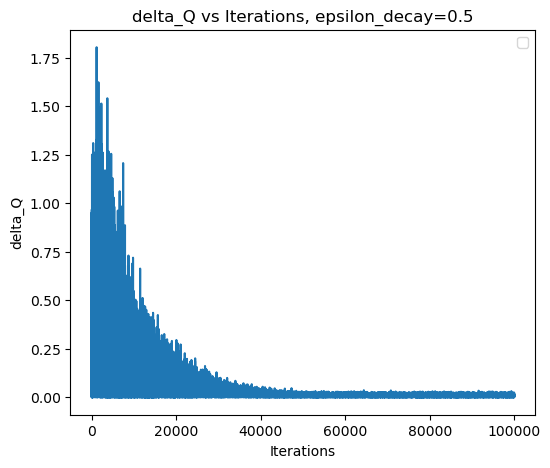

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(99999,)


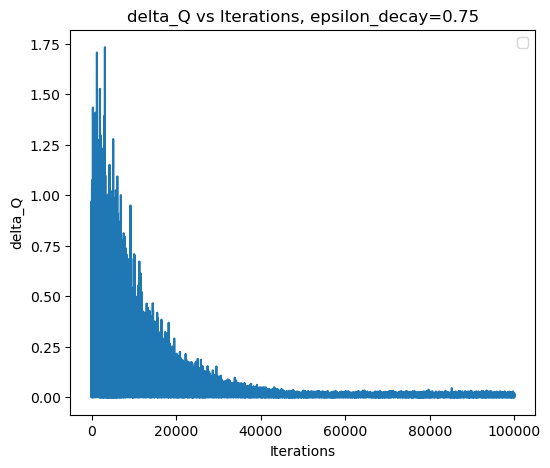

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(99999,)


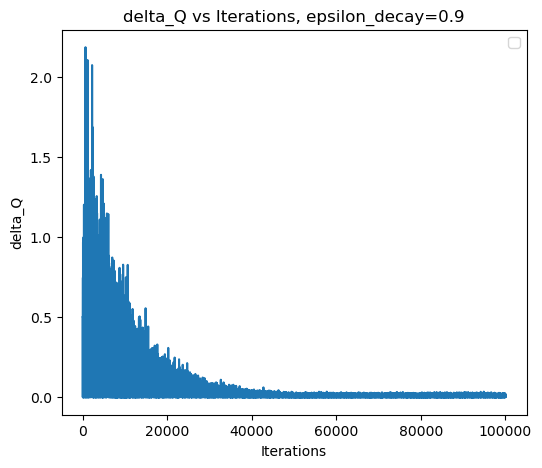

In [71]:
for epsilon_decay in epsilon_decays:
    Q_track_copy = Q_track['epsilon'][epsilon_decay].copy()
    Q_track_reshaped = Q_track_copy.reshape(Q_track_copy.shape[0], Q_track_copy.shape[1] * Q_track_copy.shape[2])

    # Calculate differences between consecutive rows
    delta_Q = np.diff(Q_track_reshaped, axis=0)
    
    # Sum absolute differences
    delta_Q = np.sum(np.abs(delta_Q), axis=1)
    print(delta_Q.shape)
    plt.figure(figsize=(6, 5))
    plt.plot(delta_Q)
    plt.xlabel("Iterations")
    plt.ylabel("delta_Q")
    plt.title(f"delta_Q vs Iterations, epsilon_decay={epsilon_decay}")
    plt.legend()
    plt.show()

Time Elapsed: 0.6270356178283691 seconds


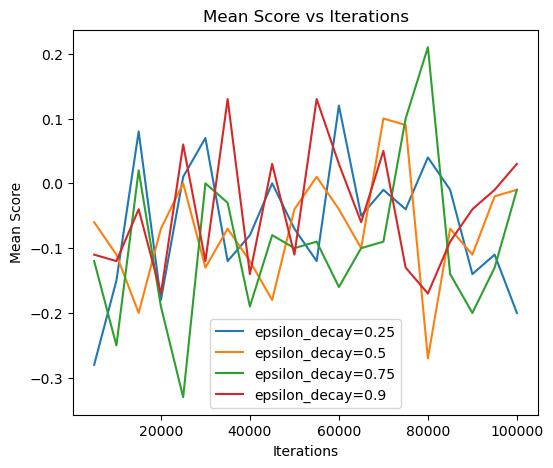

In [73]:
test_env = TestEnv()
reward_vi_epsilon = {}
epsilon_decays = [0.25, 0.5, 0.75, 0.9]
plot_range = range(4999, 100000, 5000)
start_time = time()
for epsilon_decay in epsilon_decays:
    reward_vi_epsilon[epsilon_decay] = []
    for n in plot_range:
        reward_tmp = test_env.test_env(blackjack, render=False, pi=pi_track['epsilon'][epsilon_decay][n], n_iters=100)
        reward_vi_epsilon[epsilon_decay].append(np.mean(reward_tmp))
        clear_output(wait=True)
end_time = time()
time_elapsed = end_time - start_time
print(f"Time Elapsed: {time_elapsed} seconds")

plt.figure(figsize=(6, 5))
for key, value in reward_vi_epsilon.items():
    plt.plot(plot_range, reward_vi_epsilon[key], label=f"epsilon_decay={key}")
plt.xlabel("Iterations")
plt.ylabel("Mean Score")
plt.title("Mean Score vs Iterations")
plt.legend()
plt.show()